# 3.DNN

첫번째 은닉계층에서 나온 출력이 아웃풋으로 가는게 아니라 다른 은닉계층으로 들어감

다수의 은닉 계층 활용 => 입력 신호를 더 정교하게 처리 가능

How DNN solve problem?? => UAT ([Universal approximation theorem])(https://en.wikipedia.org/wiki/Universal_approximation_theorem)


이 정리는 하나의 은닉층을 갖는 인공신경망은 임의의 연속인 다변수 함수를 원하는 정도의 정확도로 근사할 수 있음을 말한다.

-위키피디아, 시벤코 정리 - 

## 3.2 필기체 분류하는 DNN구현

1. 기본 파라미터 설정

In [0]:
Nin = 784
Nh_1 =[100,50]
number_of_class = 10
Nout = number_of_class

2. DNN 모델 구현

연쇄 방식을 객체지향 방식으로 구현

In [2]:
from keras import layers, models

Using TensorFlow backend.


In [0]:
class DNN(models.Sequential):
  def __init__(self, Nin, Nh_1, Nout):
    super().__init__()
    self.add(layers.Dense(Nh_1[0],activation='relu',input_shape=(Nin,),name='Hidden-1'))
    self.add(layers.Dense(Nh_1[1],activation='relu',name='Hidden-2'))
    self.add(layers.Dense(Nout, activation='softmax'))
    self.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

3. 데이터 준비

In [0]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [5]:
(X_train, y_train),(X_test,y_test) = datasets.mnist.load_data()
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
L,W,H = X_train.shape
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)
X_train = X_train / 255.0
X_test = X_test / 255.0

11493376/11490434 [==============================] - 6s 1us/step


4. 분류 DNN 학습 및 성능평가

In [10]:
model = DNN(Nin,Nh_1,Nout)
history = model.fit(X_train, y_train,epochs=10,batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy:',performace_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.3714 - acc: 0.8967 - val_loss: 0.1791 - val_acc: 0.9500
Epoch 2/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.1580 - acc: 0.9534 - val_loss: 0.1348 - val_acc: 0.9609
Epoch 3/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.1124 - acc: 0.9665 - val_loss: 0.1215 - val_acc: 0.9655
Epoch 4/10
48000/48000 [==============================] - 3s 65us/step - loss: 0.0881 - acc: 0.9734 - val_loss: 0.1148 - val_acc: 0.9661
Epoch 5/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.0696 - acc: 0.9795 - val_loss: 0.1111 - val_acc: 0.9660
Epoch 6/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0981 - val_acc: 0.9702
Epoch 7/10
48000/48000 [==============================] - 3s 66us/step - loss: 0.0478 - acc: 0.9851 - val_loss: 0.1025 - val_acc

# 3.3 컬러 이미지 : CIFAR-10 

10가지 사물이 담긴 총 6만장(학습:5만, 테스트:1만)의 컬러 이미지 -> 32*32*3

* 비행기
* 자동차
* 새
* 고양이
* 노루
* 개
* 개구리
* 말
* 배
* 트럭

1. 데이터 불러오기

In [0]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [0]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

2. 모델링

In [0]:
from keras import layers, models

In [0]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()

        self.add(layers.Dense(Nh_l[0], activation='relu',
                              input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))

        self.add(layers.Dense(Nh_l[1], activation='relu',
                              name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))

        self.add(layers.Dense(Nout, activation='softmax'))

        self.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [0]:
import tensorflow as tf
from keras.backend import tensorflow_backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))


3. 그래프

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

In [0]:
def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()

4.학습

In [0]:
def main(Pd_l=[0.0, 0.0]):
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performace_test)

    plot_acc(history, '(a) 학습을 통한 정확도의 변화')
    plt.show()
    plot_loss(history, '(b) 학습을 통한 손실의 변화')
    plt.show()

Pd 드롭아웃은 왜 하는걸까???????????

dropout

드롭아웃, 드랍아웃

신경망에서 오버피팅을 방지하기 위한 regularization 기법

매개변수 수를 줄임

노드를 삭제하여 입력과 출력 사이의 연결을 제거

+ https://www.youtube.com/watch?v=MXAQyLHkpkg



170500096/170498071 [==============================] - 62s 0us/step
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 90us/step - loss: 1.9444 - acc: 0.2956 - val_loss: 1.8524 - val_acc: 0.3465
Epoch 2/100
40000/40000 [==============================] - 3s 83us/step - loss: 1.7685 - acc: 0.3704 - val_loss: 1.7327 - val_acc: 0.3887
Epoch 3/100
40000/40000 [==============================] - 3s 82us/step - loss: 1.7068 - acc: 0.3955 - val_loss: 1.7258 - val_acc: 0.3860
Epoch 4/100
40000/40000 [==============================] - 3s 82us/step - loss: 1.6562 - acc: 0.4097 - val_loss: 1.7152 - val_acc: 0.3931
Epoch 5/100
40000/40000 [==============================] - 3s 83us/step - loss: 1.6204 - acc: 0.4229 - val_loss: 1.6529 - val_acc: 0.4143
Epoch 6/100
40000/40000 [==============================] - 3s 82us/step - loss: 1.5963 - acc: 0.4307 - val_loss: 1.6435 - val_acc: 0.4185
Epoch 7/100
40000/40000 [=============================

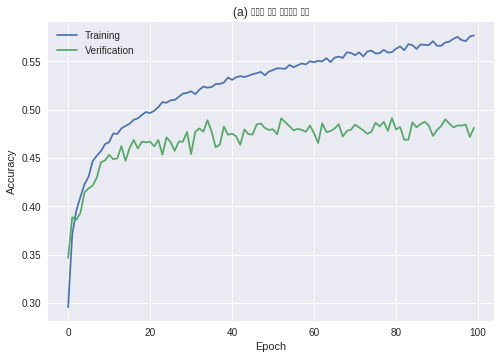

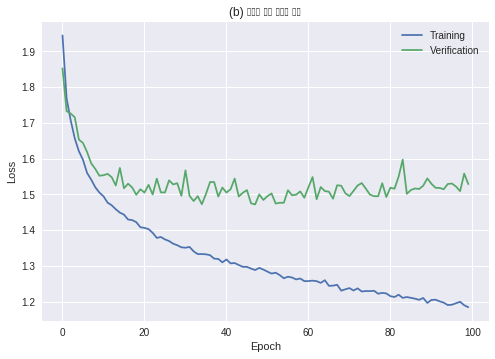

In [21]:
if __name__ == '__main__':
    main(Pd_l=[0.0, 0.0])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 96us/step - loss: 2.0974 - acc: 0.2129 - val_loss: 1.9035 - val_acc: 0.3016
Epoch 2/100
40000/40000 [==============================] - 3s 87us/step - loss: 1.9451 - acc: 0.2866 - val_loss: 1.8396 - val_acc: 0.3374
Epoch 3/100
40000/40000 [==============================] - 3s 87us/step - loss: 1.8946 - acc: 0.3101 - val_loss: 1.8126 - val_acc: 0.3474
Epoch 4/100
40000/40000 [==============================] - 3s 87us/step - loss: 1.8561 - acc: 0.3291 - val_loss: 1.7607 - val_acc: 0.3663
Epoch 5/100
40000/40000 [==============================] - 4s 88us/step - loss: 1.8222 - acc: 0.3415 - val_loss: 1.7609 - val_acc: 0.3694
Epoch 6/100
40000/40000 [==============================] - 4s 88us/step - loss: 1.8114 - acc: 0.3492 - val_loss: 1.7288 - val_acc: 0.3871
Epoch 7/100
40000/40000 [==============================] - 3s 87us/step - loss: 1.7943 - acc: 0.3591 - val_loss: 1.7268 - 

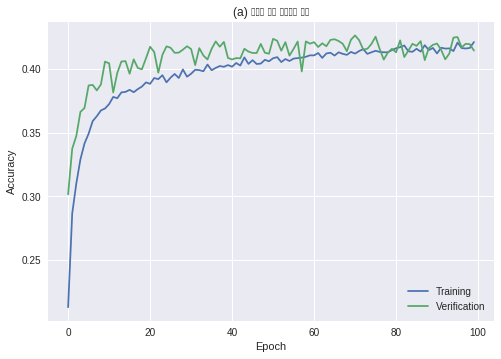

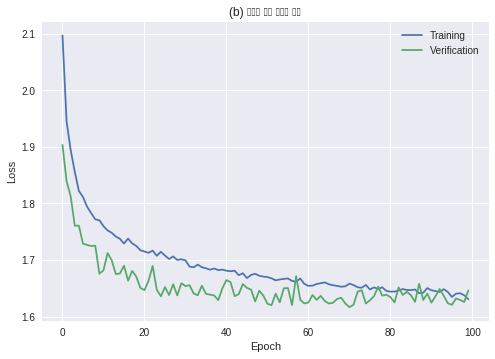

In [22]:
if __name__ == '__main__':
    main(Pd_l=[0.05, 0.5])